In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
time_serie = pd.date_range(start='1/1/1900', end='31/12/1901', freq='W')
time_serie2 = pd.date_range(start='1/6/1910', end='31/12/1915', freq='M')
random_data = np.random.random_sample((len(time_serie),))
random_data2 = np.random.random_sample((len(time_serie2),))

In [3]:
dataframe1 = pd.DataFrame({"Values":random_data}, index=time_serie)
dataframe2 = pd.DataFrame({"Values":random_data2}, index=time_serie2)
for idx, val in dataframe1.sample(30).iterrows():
    dataframe1.loc[idx] = np.nan

In [4]:
dataframe1.head()


,Values
1900-01-07,0.545535
1900-01-14,NaN
1900-01-21,0.695231
1900-01-28,0.203667
1900-02-04,0.162849


In [5]:
dataframe2.head()

,Values
1910-01-31,0.678788
1910-02-28,0.187443
1910-03-31,0.235762
1910-04-30,0.269219
1910-05-31,0.014044


In [6]:
dataframe1 = dataframe1.resample('1M').mean()

In [7]:
combined_frame = pd.concat([dataframe1, dataframe2])

In [8]:
combined_frame.head()

,Values
1900-01-31,0.481477
1900-02-28,0.458002
1900-03-31,0.487383
1900-04-30,0.354578
1900-05-31,0.406329


In [9]:
combined_frame.tail()

,Values
1915-08-31,0.105149
1915-09-30,0.154496
1915-10-31,0.197989
1915-11-30,0.983784
1915-12-31,0.846685


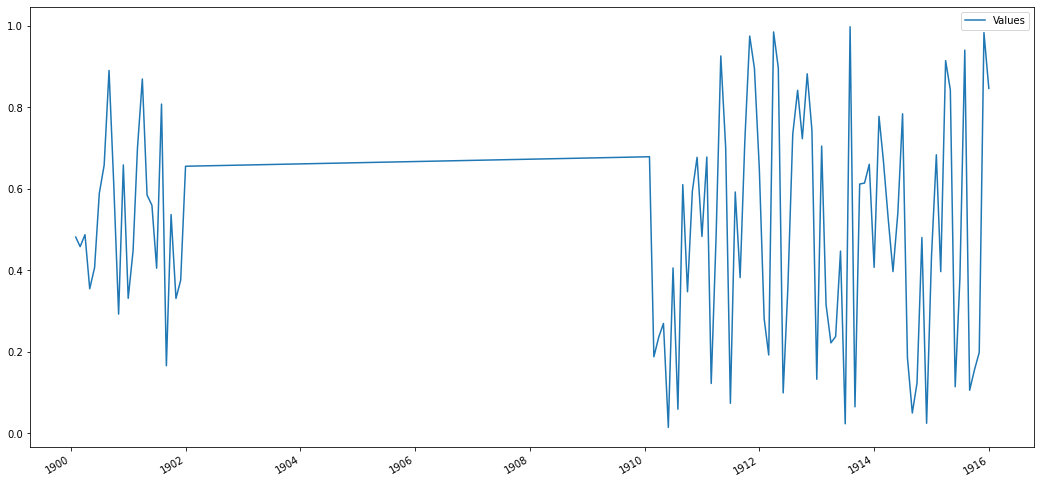

In [10]:
combined_frame.plot(figsize=(18,9))
plt.show()

In [11]:
print(dataframe1.index.min(), dataframe1.index.max())

1900-01-31 00:00:00 1901-12-31 00:00:00


In [12]:
print(dataframe2.index.min(), dataframe2.index.max())

1910-01-31 00:00:00 1915-12-31 00:00:00


In [13]:
index1 = dataframe1.index.min()
index2 = dataframe2.index.max()

In [14]:
new_index = pd.date_range(start=index1, end=index2, freq='1M')

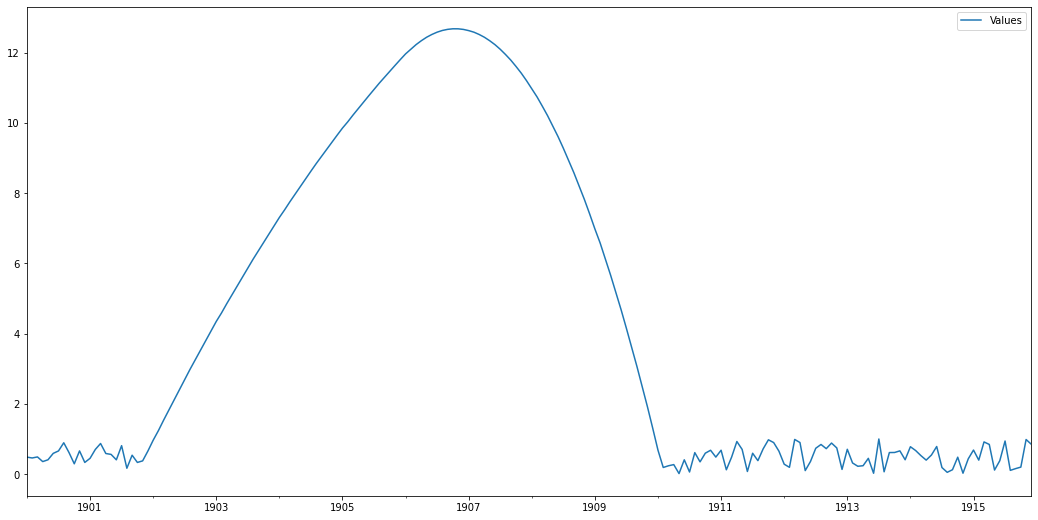

In [15]:
combined_frame = combined_frame.reindex(new_index)
combined_frame.interpolate(method='polynomial', order=2, inplace=True)
combined_frame.plot(figsize=(18,9))
plt.show()